<h1 align="center">  AIRBNB BERLIN </b> </h1><br>

Knowing that Airbnb is nowadays one of the biggest most popular online marketplaces for accommodations, I looked into the data to:

+ on one hand evaluate the impact Airbnb has on housing in Berlin
+ on the other hand investigate about who, when and how rents out in Berlin and possibly make considerations about tourism flows in Berlin

# Breakdown of this notebook:
1. **[Importing Libraries](#1.Importing-Libraries)**
2. **[Loading the dataset](#2.Loading-the-dataset)**
3. **[Data Cleaning:](#3.Data-Cleaning)** 
    - Cleaning individual columns
    - Some Transformations
    - Deleting redundant columns
4. **[Data Visualization:](#4.Data-Visualization)** 
    - [Listing types](#4.1-Listing-types)
    - [Neighborhoods](#4.2-Neighborhoods) 
    - [Ownership](#4.3-Ownership) 
    - [Prices](#4.4-Prices) 
    - [Reviews](#4.5-Reviews) 
5. **[Conclusions](#5.Conclusions)** 

# 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import geopandas as gpd
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from langdetect import detect
def mydetect(text):
    try:
        return detect(text)
    except:
        return np.nan

# 2.Loading the dataset

Link to download the original dataset http://insideairbnb.com/get-the-data.html

In [2]:
listings_detail_df=pd.read_csv('data/airbnb_berlin_listings_detailed.csv')
listings_detail_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20211217003618,2021-12-17,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,It is located in the former East Berlin area o...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,...,4.90,4.96,4.58,NaN,f,4,4,0,0,2.08
1,3176,https://www.airbnb.com/rooms/3176,20211217003618,2021-12-17,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,...,4.69,4.92,4.63,NaN,f,1,1,0,0,0.97
2,7071,https://www.airbnb.com/rooms/7071,20211217003618,2021-12-17,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",https://a0.muscache.com/pictures/21278/32a1622...,17391,https://www.airbnb.com/users/show/17391,...,4.85,4.91,4.71,NaN,t,1,0,1,0,1.95
3,9991,https://www.airbnb.com/rooms/9991,20211217003618,2021-12-17,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.10
4,14325,https://www.airbnb.com/rooms/14325,20211217003618,2021-12-17,Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,...,4.84,4.58,4.42,NaN,f,3,3,0,0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,53824920,https://www.airbnb.com/rooms/53824920,20211217003618,2021-12-17,In the heart of Kreuzberg! Cosy room with charme,"The room is in a 3room flat, so you will live ...",We are in the HEART of Kreuzberg!!!!❤️❤️❤️,https://a0.muscache.com/pictures/3df24cda-af2d...,6584851,https://www.airbnb.com/users/show/6584851,...,NaN,NaN,NaN,02/Z/AZ/014067-21,f,6,1,5,0,NaN
17286,53829563,https://www.airbnb.com/rooms/53829563,20211217003618,2021-12-17,Spacious DesignApartment - Kreuzberg,This luxurious urban industrial- style apartme...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,56165003,https://www.airbnb.com/users/show/56165003,...,NaN,NaN,NaN,First name and Last name: M&amp;F Realestates ...,t,4,4,0,0,NaN
17287,53844081,https://www.airbnb.com/rooms/53844081,20211217003618,2021-12-17,One-room apartment with a large private garden!,"Modern, aesthetic space with an Asian touch, t...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,229695072,https://www.airbnb.com/users/show/229695072,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
17288,53846012,https://www.airbnb.com/rooms/53846012,20211217003618,2021-12-17,Cute and cosy apartment in Berlin,Small but cute apartment perfect for a single ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,326710801,https://www.airbnb.com/users/show/326710801,...,NaN,NaN,NaN,First name and Last name: Wiktoria Rychlewski ...,t,1,1,0,0,NaN


Data Description

In [3]:
dictionary_df=pd.read_csv('data/airbnbdictionary.csv')
dictionary_df

,Field,Type,Calculated,Description,Reference,Unnamed: 5
0,id,integer,NaN,Airbnb's unique identifier for the listing,NaN,NaN
1,name,string,NaN,NaN,NaN,NaN
2,host_id,integer,NaN,NaN,NaN,NaN
3,host_name,string,NaN,NaN,NaN,NaN
4,neighbourhood_group,text,y,The neighbourhood group as geocoded using the ...,NaN,NaN
5,neighbourhood,text,y,The neighbourhood as geocoded using the latitu...,NaN,NaN
6,latitude,numeric,NaN,Uses the World Geodetic System (WGS84) project...,NaN,NaN
7,longitude,NaN,NaN,Uses the World Geodetic System (WGS84) project...,NaN,NaN
8,room_type,string,NaN,NaN,NaN,NaN
9,price,currency,NaN,"daily price in local currency. Note, $ sign ma...",NaN,NaN


# 3.Data Cleaning

Clean 'price' column.

In [4]:
listings_detail_df[['price']] = (
    listings_detail_df[['price']]
    .apply(lambda col: (
        col
        .str[1:]
        .str.replace(',', '')
        .apply(float)))
    .fillna(0))

Create 'accommodates_group' column.

In [5]:
listings_detail_df['accommodates_group'] = (
    listings_detail_df['accommodates']
    .pipe(pd.cut, bins=[1,2,3,5,20], include_lowest=True, right=False, 
          labels=['Single', 'Couple', 'Family', 'Group']))

New dataframe with only meaningful columns.

In [6]:
listings_lite_df = listings_detail_df[[
    'id', 'host_id', 'room_type', 'neighbourhood_group_cleansed', 
    'price', 'accommodates', 
    'review_scores_rating', 
    'latitude', 'longitude', 'accommodates_group' ]].copy()


Examining Changes

In [7]:
listings_lite_df

,id,host_id,room_type,neighbourhood_group_cleansed,price,accommodates,review_scores_rating,latitude,longitude,accommodates_group
0,2015,2217,Entire home/apt,Mitte,53.0,2,4.66,52.533050,13.403940,Couple
1,3176,3718,Entire home/apt,Pankow,90.0,4,4.63,52.534710,13.418100,Family
2,7071,17391,Private room,Pankow,33.0,2,4.83,52.543010,13.415340,Couple
3,9991,33852,Entire home/apt,Pankow,180.0,7,5.00,52.532690,13.418050,Group
4,14325,55531,Entire home/apt,Pankow,70.0,1,4.67,52.548130,13.403660,Single
...,...,...,...,...,...,...,...,...,...,...
17285,53824920,6584851,Private room,Friedrichshain-Kreuzberg,28.0,2,NaN,52.496769,13.426181,Couple
17286,53829563,56165003,Entire home/apt,Friedrichshain-Kreuzberg,87.0,9,NaN,52.492480,13.377050,Group
17287,53844081,229695072,Entire home/apt,Mitte,60.0,2,NaN,52.556938,13.395294,Couple
17288,53846012,326710801,Entire home/apt,Lichtenberg,26.0,2,NaN,52.528878,13.470175,Couple


# 4.Data Visualization

The points that need to be addressed are:

+ Listings types: Airbnb initial idea was to offer a room or a shared room inside one's own house. Is it still so?
+ Listings density: are listings evenly distributed across all the neighbourhoods or there are some hot areas?
+ Ownership: are properties owned by single private users or are there are users that own and rent out multiple places (i.e. possibly speculating)?
+ Price fairness: are prices inflated for tourists? That is, is there a significative difference in prices between listings in English (i.e. for tourists) and German (i.e. "locals", or at least German-speaking tourists)? If there is, is this difference stronger in certain districts?
+ Reviews: Since we do not have historic data about stays but only about reviews, we could use reviews as estimators of stays/visits. Has the number of reviews increased over time? If it has, can we say that the increment is due to an increased number of visitors or it must be simply abscribed to an increment in the popularity of the platform?
Is the flow of tourists seasonal, that is does it follow a seasonal trend? Can we explain the pattern?

### 4.1 Listing types

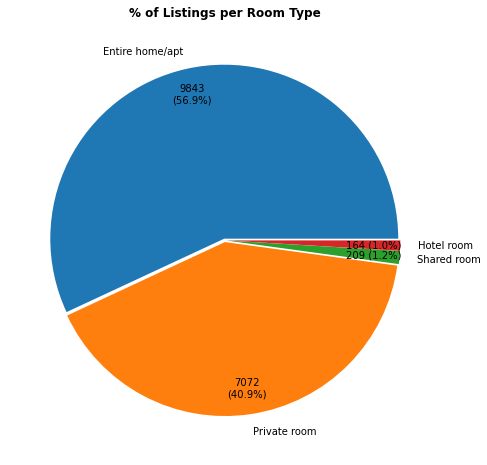

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

pie_data = (
    listings_lite_df['room_type']
    .value_counts())

(pie_data
 .plot(kind='pie', 
       autopct=lambda v: (
           '{}'.format(int(v/100*sum(pie_data))) +
           '\n' * int(v > 10) + ' ' * int(v <= 10) +
           '({:.1%})'.format(v/100)),
       explode=(0.01, ) * len(pie_data), pctdistance=0.85, labeldistance=1.1,
       ax=ax), )

ax.set_ylabel('')
ax.set_title('% of Listings per Room Type', weight='bold')
plt.show()

Airbnb was originally created to share rooms, but **almost 60% of the listings in Berlin are actually about entire homes or apartments or even hotel rooms**. While private and shared rooms make only around 40%.



### 4.2 Neighborhoods

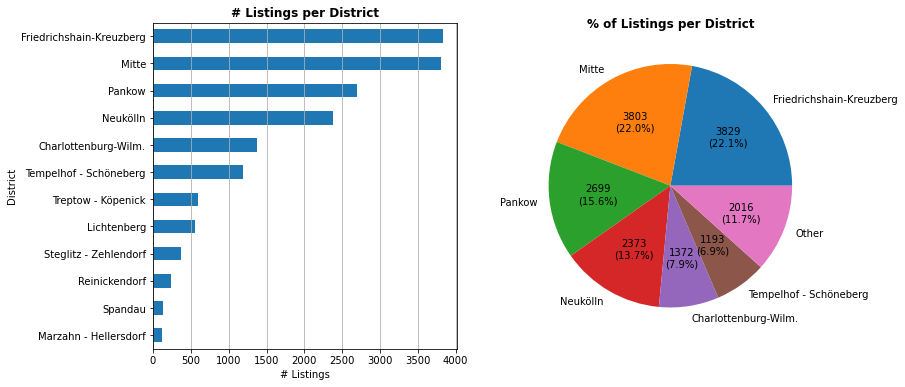

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

n_listings_per_district = (
    listings_lite_df['neighbourhood_group_cleansed']
     .value_counts())

(n_listings_per_district.iloc[::-1]).plot(kind='barh', ax=ax1)

ax1.grid(axis='x')
ax1.set_title('# Listings per District', weight='bold')
ax1.set_ylabel('District')
ax1.set_xlabel('# Listings')


pie_data = (
    n_listings_per_district
    .rename(index={v: 'Other' for v in n_listings_per_district.index[6:]})
    .groupby(level=0, sort=False)
    .sum())


(pie_data
 .plot(kind='pie', 
       explode=(0., 0, 0, 0, 0, 0, 0),    
       ax=ax2))


#NUMEROS DE LA TARTA:

pie2_data = (
    pie_data
    .groupby(lambda v: v if v in ['Mitte', 'Friedrichshain-Kreuzberg', 'Other', 'Pankow','Neukölln','Charlottenburg-Wilm.', 'Tempelhof - Schöneberg'] else '', sort=False) 
    .sum())


(pie2_data
 .rename(index=lambda v: '')
 .plot(kind='pie', 
       explode=(0.02, 0,0,0,0,0, 0.02),                       
       autopct=lambda v: (
           '{}'.format(int(v/100*sum(pie_data))) +
           '\n' + '({:.1%})'.format(v/100)),
       wedgeprops={'alpha': 0},
       ax=ax2))

ax2.set_title('% of Listings per District', weight='bold')
ax2.set_ylabel('')

plt.show()

Friedrichshain-Kreuzberg and Mitte, two districts located in the center of Berlin, have almost 45% of the total listings.

That is, **the center is extremely packed with Airbnbs**. But are these places apartments or rooms?

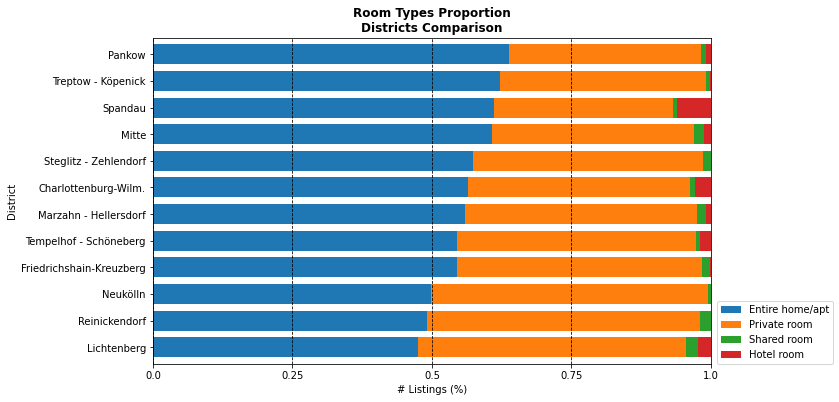

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

barplot_data = (
    listings_lite_df
    .groupby(['neighbourhood_group_cleansed', 'room_type'])
    .size()
    .unstack('room_type')
    .fillna(0)
    .apply(lambda row: row / row.sum(), axis=1)
    .sort_values('Entire home/apt')
    .reindex(columns=listings_lite_df['room_type'].value_counts().index))

barplot_data.plot(kind='barh', width=.75, stacked=True, ax=ax)

ax.set_xticks(np.linspace(0,1, 5))
ax.set_xticklabels(np.linspace(0,1, 5))
ax.grid(axis='x', c='k', ls='--')
ax.set_xlim(0,1)

ax.set_ylabel('District')
ax.set_xlabel('# Listings (%)')
ax.legend(loc=(1.01, 0))

ax.set_title('Room Types Proportion\nDistricts Comparison', weight='bold')

plt.show()

The proportion is very similar across all the districts.

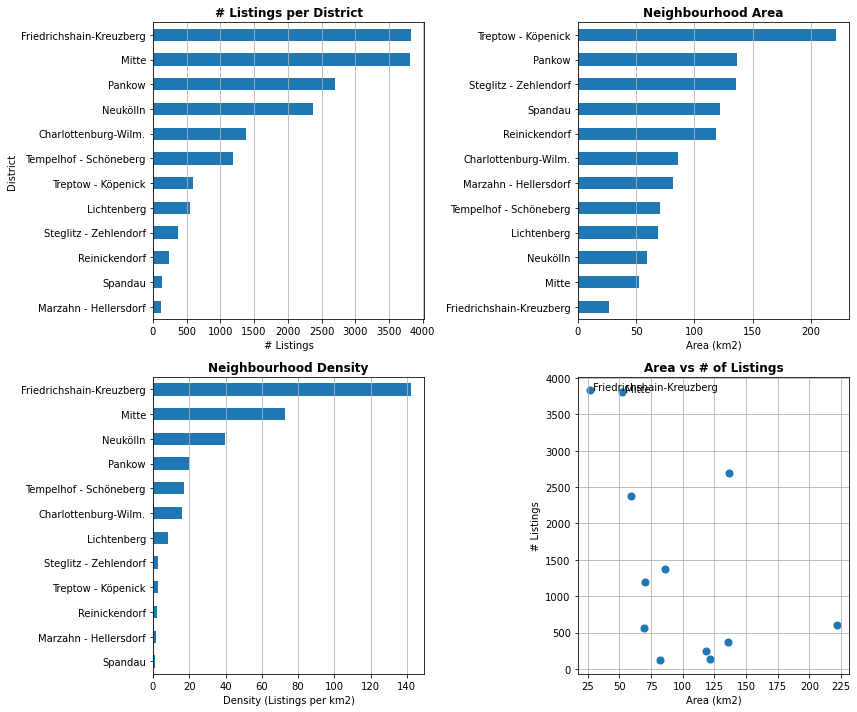

In [11]:
import json
from shapely.geometry import MultiPolygon
with open('data/neighbourhoods.geojson', encoding='utf8') as f: #encoding='utf8' for german umlaut
    geojson = json.loads(f.read())
areas = [{'area': MultiPolygon(feature['geometry']['coordinates'], context_type='geojson').area, 
          **feature['properties']} for feature in geojson['features']]
areas_srs = (
    pd.DataFrame(areas)
    .groupby('neighbourhood_group')
    ['area']
    .sum() * 10**4)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

(n_listings_per_district.iloc[::-1]).plot(kind='barh', ax=ax1)

ax1.grid(axis='x')
ax1.set_title('# Listings per District', weight='bold')
ax1.set_ylabel('District')
ax1.set_xlabel('# Listings')

areas_srs.sort_values().plot(kind='barh', ax=ax2)

ax2.set_title('Neighbourhood Area', weight='bold')
ax2.grid(axis='x')
ax2.set_ylabel('')
ax2.set_xlabel('Area (km2)')

n_listings_per_district.divide(areas_srs).sort_values().plot(kind='barh', ax=ax3)

ax3.set_title('Neighbourhood Density', weight='bold')
ax3.set_xlabel('Density (Listings per km2)')
ax3.grid(axis='x')

scatter_data = pd.concat([n_listings_per_district.rename('n_listings'), areas_srs], axis=1, sort=False)

scatter_data.plot(kind='scatter', x='area', y='n_listings', s=50, ax=ax4)
ax4.set_xlabel('Area (km2)')
ax4.set_ylabel('# Listings')
ax4.set_title('Area vs # of Listings', weight='bold')
ax4.grid(which='both')
ax4.text(*scatter_data.loc['Mitte'].values[::-1], ' Mitte')
ax4.text(*scatter_data.loc['Friedrichshain-Kreuzberg'].values[::-1], ' Friedrichshain-Kreuzberg ', ha='left')

fig.tight_layout()
plt.show()

+ The two **neighbourhoods with the most listings**, Friedrichshain-Kreuzberg and Mitte, **are also the smallest neighbourhoods** in the whole city.

+ Friedrichshain-Kreuzberg has the highest density, and Mitte comes in the second place but with half the density.

Let's plot the listings onto a map using the latitude and longitude values with a scatterplot:

In [12]:
#creating a sub-dataframe with no extreme values / less than 500
df_500=listings_lite_df[listings_lite_df.price < 500]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

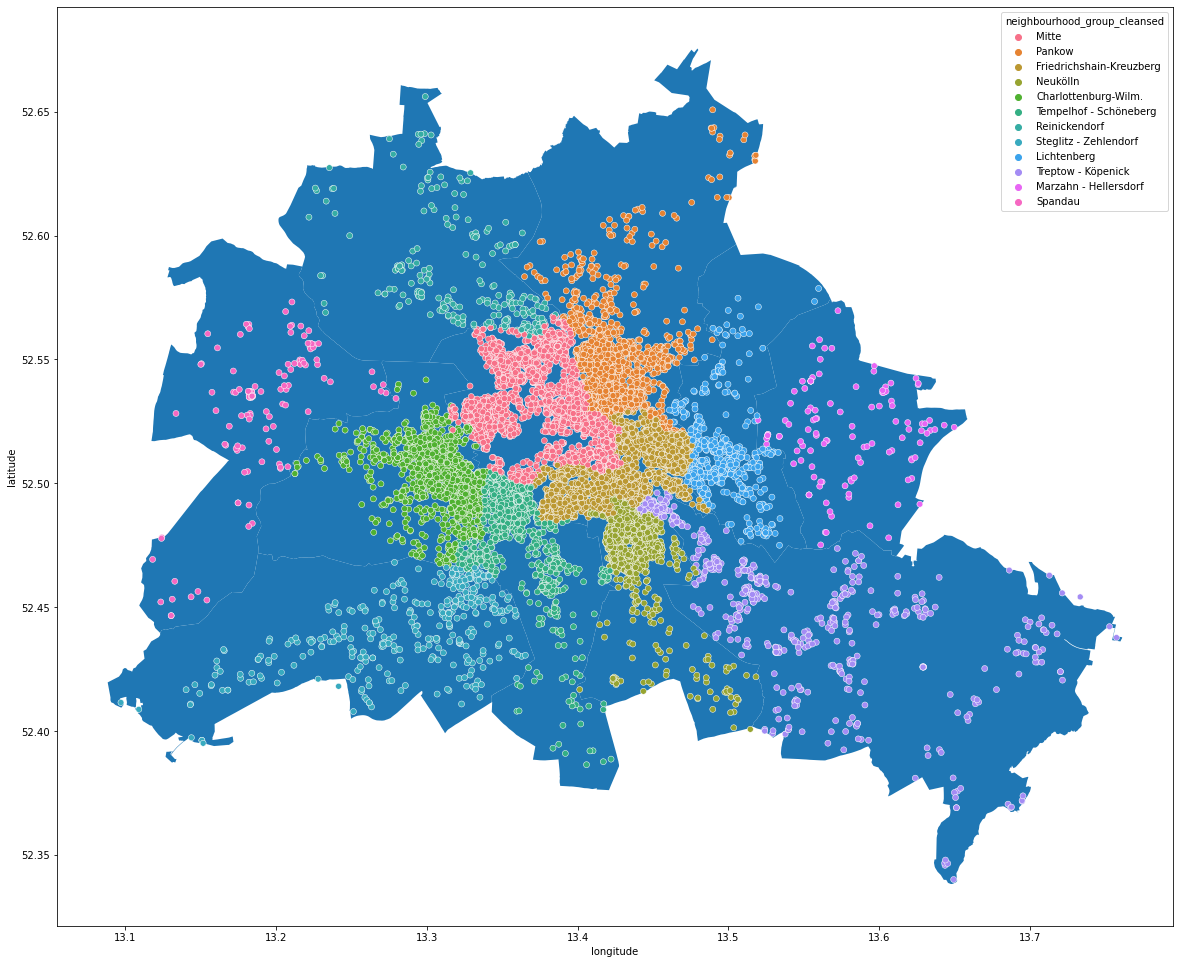

In [13]:
berlin = gpd.read_file('data/berlin-latest-free.shp/bezirksgrenzen.shp')

berlin.plot(figsize = (20,20))

sns.scatterplot(df_500.longitude,df_500.latitude,hue=df_500.neighbourhood_group_cleansed)

This confirms what we saw before. **Most of the listings are located in the center of Berlin**.

### 4.3 Ownership

See if there are some users (or agencies) who are managing most of the listings:

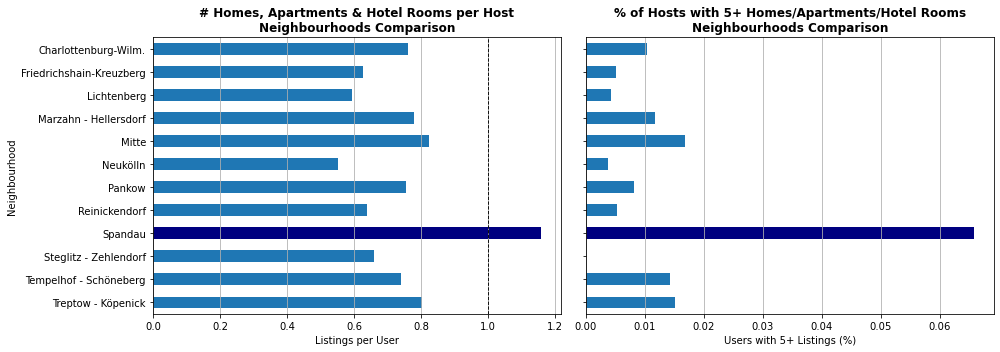

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=True)

hosts_per_neighbourhood = listings_lite_df.groupby('neighbourhood_group_cleansed')['host_id'].nunique()

listings_per_host_per_neighbourhood = (
    (listings_lite_df[
        listings_lite_df['room_type']
        .isin(['Entire home/apt', 'Hotel room'])]
    .groupby('neighbourhood_group_cleansed')
    .size() / hosts_per_neighbourhood)
    .iloc[::-1]
)

multiple_listings_perc_per_neighbourhood = (
    (listings_lite_df
    [listings_lite_df['room_type'].isin(['Entire home/apt', 'Hotel room'])]
    .groupby(['neighbourhood_group_cleansed', 'host_id'])
    .size().ge(5)
    .groupby('neighbourhood_group_cleansed')
    .sum() / hosts_per_neighbourhood)
    .iloc[::-1]
)

(listings_per_host_per_neighbourhood
 .plot(kind='barh', color=[sns.color_palette()[0] 
                           if n != 'Spandau' else 'navy' 
                           for n in listings_per_host_per_neighbourhood.index], ax=ax1))

(multiple_listings_perc_per_neighbourhood
 .plot(kind='barh', color=[sns.color_palette()[0] 
                           if n != 'Spandau' else 'navy' 
                           for n in multiple_listings_perc_per_neighbourhood.index], ax=ax2))

ax1.grid(axis='x')
ax2.grid(axis='x')
ax1.set_ylabel('Neighbourhood')
ax1.set_xlabel('Listings per User')
ax2.set_xlabel('Users with 5+ Listings (%)')
ax1.axvline(1, c='k', ls='--', lw=.9)

ax1.set_title('# Homes, Apartments & Hotel Rooms per Host\nNeighbourhoods Comparison', weight='bold')
ax2.set_title('% of Hosts with 5+ Homes/Apartments/Hotel Rooms\nNeighbourhoods Comparison', weight='bold')

fig.tight_layout()
plt.show()

There are not a lot of differences between districts. Spandau stands out but we should not draw any conclusion since the number of listings in that district is very low.

In previous plots we saw that in Mitte there are 3803 total listings and around 60% of that number are "Entire home/apt" and "Hotel room". Ideally, if each host only had one listing, we should be seeing 0.6 Listings per User in this plot, but we see 0.8 Listings per User in Mitte. This suggest there are **some hosts with more than one listing** of the type "Entire home/apt" or "Hotel room".

Let's look some more into the hosts. One host should ideally only have one property on rent:

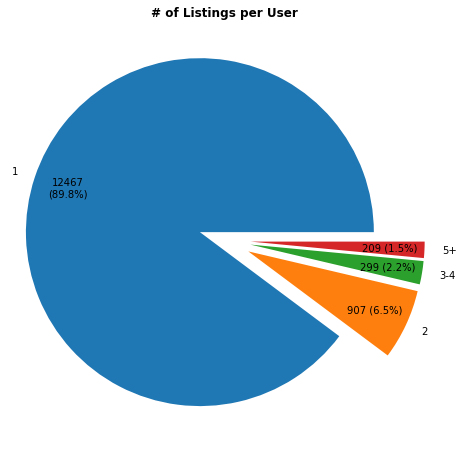

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

n_listings_per_user = (
    listings_lite_df
    .groupby('host_id')
    .size())

pie_data = (
    n_listings_per_user
    .pipe(pd.cut, bins=[1,2,3,5,1000], include_lowest=True, right=False,
       labels=['1', '2', '3-4', '5+']).value_counts())

pie_data.plot(kind='pie',
              explode=(0.15, ) * len(pie_data),
              autopct=lambda v: (
           '{}'.format(int(v/100*sum(pie_data))) +
           '\n' * int(v > 10) + ' ' * int(v <= 10) +
           '({:.1%})'.format(v/100)),pctdistance=0.8, labeldistance=1.1)

ax.set_ylabel('')
ax.set_title('# of Listings per User', weight='bold')

plt.show()

Almost **10% of the hosts have more than one listing**. This may not sound so bad at first, but now think that every 10 users 1 has at least 2 properties!

Let's take a look at the users with the most listings:

In [17]:
n_listings_per_user.sort_values().iloc[::-1].head(10).to_frame('n_properties')

,n_properties
host_id,
76954154,51
8250486,49
210700814,44
335573202,44
378071271,38
8912086,38
426164797,35
108025548,30
386848467,30


Now let's look at the same problem from another perspective. How many properties are rented out by an owner with multiple properties?

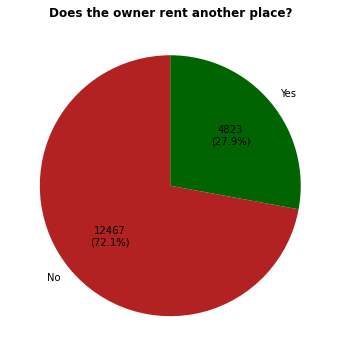

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

pie_data = (
    listings_lite_df['host_id']
    .map(listings_lite_df.groupby('host_id').size() > 1).value_counts())

pie_data.plot(
    kind='pie', labels=['No', 'Yes'], colors=['firebrick', 'darkgreen'], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax)

ax.set_ylabel('')
ax.set_title('Does the owner rent another place?', weight='bold')

plt.show()

This means that **only 27% of the properties listed for Berlin, are owned by an user which has another property**. However this could also be due to the fact that some users who own an entire apartment rent the rooms of that property separately, that would make them appear in the user list with several listings although in reality they only own a single property.

Let's see how many users that own an **entire property** rent out more.

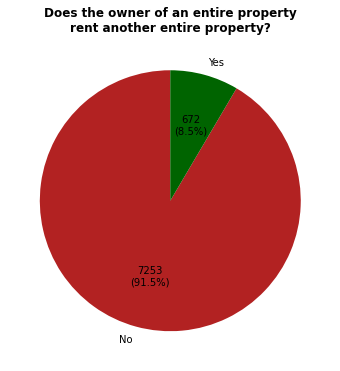

In [19]:
fig, ax = plt.subplots(figsize=(6,6))

pie_data = (
    listings_lite_df[
        listings_lite_df['room_type'].isin(['Entire home/apt', 'Hotel room'])]
    .groupby('host_id')
    .size()
    .gt(1)
    .value_counts())

pie_data.plot(
    kind='pie', labels=['No', 'Yes'], colors=['firebrick', 'darkgreen'], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax)

ax.set_ylabel('')
ax.set_title('Does the owner of an entire property\nrent another entire property?', weight='bold')

plt.show()

Multiple ownership is not a big problem in Berlin, as **only 8,5% of users who rent an entire property have at least another property** listed.

### 4.4 Prices

We will only keep listings having prices below 500 per night.

In [20]:
listings_lite_df = listings_lite_df[listings_lite_df['price'] < 500]

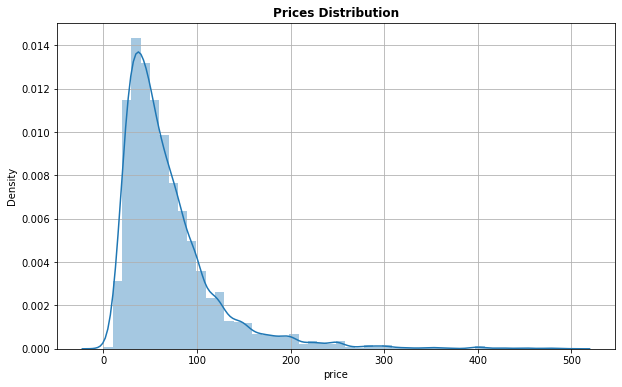

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(listings_lite_df['price'])
plt.title('Prices Distribution', weight='bold')
plt.grid()

plt.show()

It's quite clear, most of the listings have a price lower than 100 per night Let's see if price has different distribution depending on the language.

In [22]:
trans_prices = listings_lite_df['price'].pipe(np.log1p)
listings_lite_df['name_lang'] = listings_detail_df['name'].apply(mydetect)

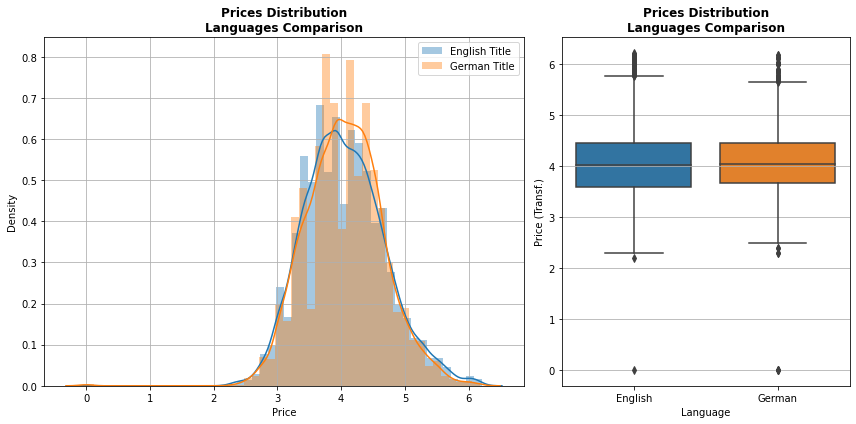

In [23]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={'width_ratios': [1, .6]})

sns.distplot(trans_prices[listings_lite_df['name_lang'] == 'en'], ax=ax, label='English Title')
sns.distplot(trans_prices[listings_lite_df['name_lang'] == 'de'], ax=ax, label='German Title')

ax.set_title('Prices Distribution\nLanguages Comparison', weight='bold')
ax.set_xlabel('Price')
ax.set_ylabel('Density')
ax.grid()
ax.legend()

sns.boxplot(
    x='name_lang', y='trans_price',
    data=(listings_lite_df[listings_lite_df['name_lang'].isin(['de', 'en'])]
          .assign(trans_price=lambda df: df['price'].pipe(np.log1p))),
    order=['en', 'de'], ax=ax2)

ax2.set_title('Prices Distribution\nLanguages Comparison', weight='bold')
ax2.set_xlabel('Language')
ax2.set_xticklabels(['English', 'German'])
ax2.set_ylabel('Price (Transf.)')
ax2.grid(axis='y')

fig.tight_layout()
plt.show()

The distribution for listings with English titles and listings with German titles is practically identical.

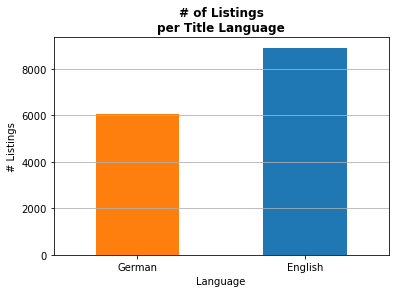

In [24]:
samples = trans_prices.groupby(listings_lite_df['name_lang']).apply(list).loc[['de', 'en']]
samples_sizes = samples.apply(len)

samples_sizes.plot(kind='bar', color=sns.color_palette()[:2][::-1])
plt.title('# of Listings\nper Title Language', weight='bold')
plt.ylabel('# Listings')
plt.xticks([0,1], ['German','English'],rotation=0)
plt.xlabel('Language')
plt.grid(axis='y')

plt.show()

### 4.5 Reviews

First we are going to import the reviews file.

In [25]:
reviews_df = (
    pd.read_csv('data/reviews.csv', 
                parse_dates=['date'])
    .rename(columns={'id': 'review_id'})
    .sort_values('date'))

reviews_df.head(20)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
144,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."
291,7071,7726,2009-08-18,30084,Ben,I could not have asked for a better place to s...
292,7071,18259,2009-11-25,50988,Tarnia,"This room is really lovely! It is quiet, comf..."
666,17904,26752,2010-02-18,73252,Thomas,"It was a very calm, cute and warm studio, clos..."
293,7071,38158,2010-04-26,96258,Maria Cristina,Staying at bright room was realy nice and conf...
294,7071,41112,2010-05-09,109507,Ying,"a wonderful, comfortable and spacious room wit..."
618,16644,49664,2010-06-04,120522,Ben,a great apartment in a fantastic area!\r<br/>w...
1633,23834,50706,2010-06-07,118840,Alex,"The apartment is in a very quiet building, and..."
1634,23834,58562,2010-06-28,143023,William,I stayed in Tanja's Kreuzberg apartment for a ...
592,14325,59118,2010-06-29,151210,Jeanne,"We had everything we needed, the apartment was..."


In [26]:
reviews_df.shape

(412678, 6)

There are some reviews from 2009 and 2010 but the information from those years is mostly incomplete, so we are going to look at reviews from 2011 onwards.

In [27]:
reviews_df = (
    reviews_df
    .pipe(pd.merge, (listings_lite_df
                     .rename(columns={'id': 'listing_id'})
                     [['listing_id', 'room_type', 'accommodates_group']])))
reviews_df = reviews_df[reviews_df['date'].dt.year.between(2011,2022)]

Some reviews are about cancellations, which are seemingly automatically posted, let's get rid of those rows.

In [28]:
reviews_df2 = reviews_df[
    reviews_df['comments'].notna() &
    (~reviews_df['comments'].fillna('').str.contains('The host cancel*ed ((my)|(this)) reservation')) &
    (~reviews_df['comments'].fillna('').str.contains('The reservation was cancel*ed'))
].copy()

In [29]:
reviews_df2.shape

(405944, 8)

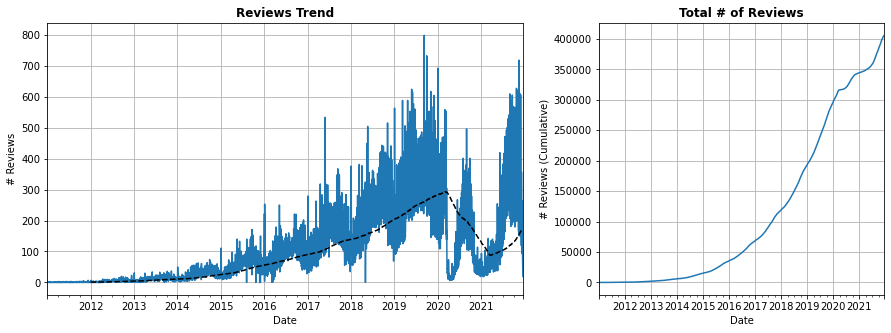

In [30]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, .6]})

n_reviews_srs = (
    reviews_df2
    .groupby('date')
    .size()
    .reindex(index=pd.date_range(*reviews_df['date'].agg(['min', 'max']).values))
    .fillna(0))

n_reviews_srs.plot(ax=ax)
n_reviews_srs.rolling(365).mean().plot(ax=ax, c='k', ls='--')

ax.set_xlabel('Date')
ax.set_ylabel('# Reviews')
ax.set_title('Reviews Trend', weight='bold')
ax.grid(axis='both')

n_reviews_srs.cumsum().plot(ax=ax2)

ax2.set_xlabel('Date')
ax2.set_ylabel('# Reviews (Cumulative)')
ax2.set_title('Total # of Reviews', weight='bold')
ax2.grid(axis='both')

plt.show()

+ **Prices** have been **increasing over the years**.

+ The **pandemic** situation has altered everything: **prices fell hard in 2020** due to Corona and since then the prices are highly **dependant on the Corona waves**.

+ Strong **seasonality**.

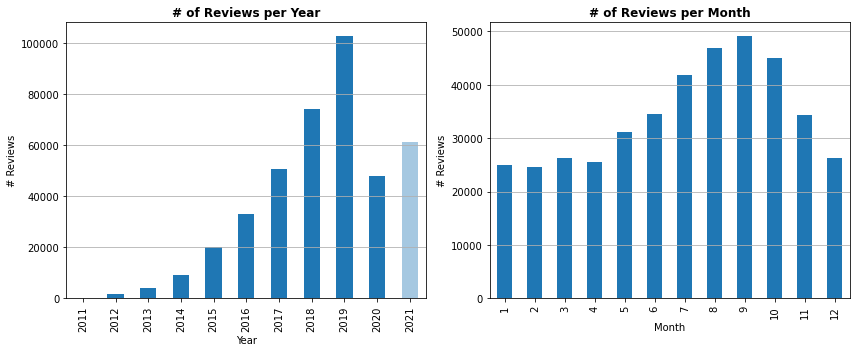

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

n_reviews_per_year = (
    reviews_df2
    .groupby(reviews_df['date'].dt.year)
    .size()
    .sort_index())

plot_data = n_reviews_per_year.copy()
plot_data.iloc[-1] = np.nan
plot_data.plot(kind='bar', ax=ax1)
plot_data = n_reviews_per_year.copy()
plot_data.iloc[:-1] = np.nan
plot_data.plot(kind='bar', ax=ax1, alpha=.4)

ax1.set_xlabel('Year')
ax1.set_ylabel('# Reviews')
ax1.set_title('# of Reviews per Year', weight='bold')
ax1.grid(axis='y')

n_reviews_per_month = (
    reviews_df
    .groupby(reviews_df['date'].dt.month)
    .size()
    .sort_index())

n_reviews_per_month.plot(kind='bar', ax=ax2)

ax2.set_xlabel('Month')
ax2.set_ylabel('# Reviews')
ax2.set_title('# of Reviews per Month', weight='bold')
ax2.grid(axis='y')


fig.tight_layout()
plt.show()

+ The month with the most reviews is September. However, in order to inspect seasonality we should compare years against each other, we will do that later.

+ Looking at number of reviews per year we see the **number of reviews growing anually** (except in 2020 and 2021 due to Corona). What is the reason of this growth? An increased number of active reviewers? An increased number of active listings? An increased number of reviews per listings? Let's take a look:

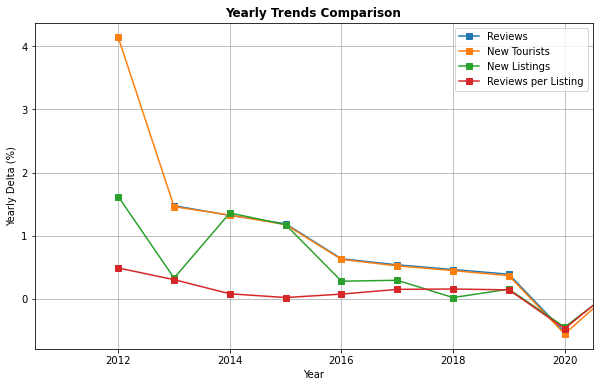

In [32]:
lambda_diff = lambda srs: (srs - srs.shift()) / srs.shift()

fig, ax = plt.subplots(figsize=(10,6))
kwargs = {'marker': 's', 'ax': ax}

n_reviews_per_year.iloc[1:-1].pipe(lambda_diff).plot(label='Reviews', **kwargs)

(reviews_df2
 .groupby('reviewer_id')
 ['date']
 .min()
 .dt.year
 .value_counts()
 .sort_index()
 .pipe(lambda_diff)).plot(label='New Tourists', **kwargs)

(reviews_df2
 .groupby('listing_id')
 ['date']
 .min()
 .dt.year
 .value_counts()
 .sort_index()
 .pipe(lambda_diff)).plot(label='New Listings', **kwargs)

(reviews_df2
.groupby([reviews_df2['date'].dt.year.rename('year'), 'listing_id'])
.size()
.groupby('year')
.mean()
.pipe(lambda_diff)).plot(label='Reviews per Listing', **kwargs)

ax.legend()
ax.grid()
# ax.set_ylim(-2.15, 2.15)
ax.set_xlim(2010.5, 2020.5)
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Delta (%)')
ax.set_title('Yearly Trends Comparison', weight='bold')

plt.show()

The number of new reviews follows the very same trend of **new tourists** (actually, new reviewers), which seems to be the **main driving factor**.

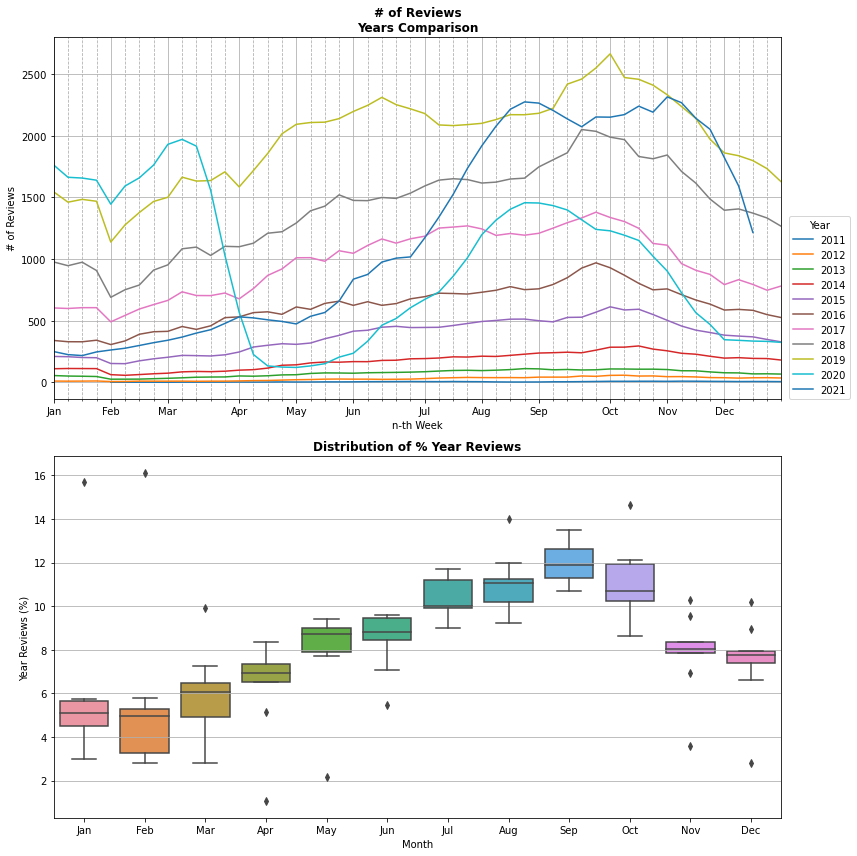

In [33]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 12))

n_reviews_nthweek_x_year_srs = (
    n_reviews_srs
    .groupby([
     n_reviews_srs.index.to_series().dt.year.rename('Year'),
     n_reviews_srs.index.to_series().dt.weekofyear.rename('n-th Week')])
    .sum())

(n_reviews_nthweek_x_year_srs
 .iloc[1:-1]
 .rolling(4)
 .mean()
 .unstack('Year')).plot(ax=ax)

months_dts = [dt for dt in pd.date_range('2019-01-01', '2019-12-31') if dt.is_month_start]
ax.set_xticks([dt.weekofyear for dt in months_dts])
ax.set_xticklabels([dt.strftime('%b') for dt in months_dts])
ax.set_xticks(range(1,53), minor=True)
ax.set_xlim(1, 52)
ax.set_ylabel('# of Reviews')
ax.set_title('# of Reviews\nYears Comparison', weight='bold')
ax.legend(title='Year', loc=(1.01, 0))

ax.add_artist(plt.Rectangle((months_dts[5].weekofyear, 7000), width=5, height=1200,
                            facecolor='r', alpha=.4, edgecolor='r', lw=4))
ax.grid(axis='both')
ax.grid(axis='x', which='minor', ls='--')

n_reviews_month_x_year_df = (
    n_reviews_srs
    .groupby([
         n_reviews_srs.index.to_series().dt.year.rename('Year'),
         n_reviews_srs.index.to_series().dt.month.rename('Month')])
    .sum()
    .unstack('Year'))
perc_year_reviews_x_month_df = (
    n_reviews_month_x_year_df
    .divide(n_reviews_month_x_year_df.sum()))

boxplot_data = (
    perc_year_reviews_x_month_df
    .iloc[:, 1:-1]
    .stack()
    .to_frame('% Year Reviews')
    .reset_index())

sns.boxplot(x='Month', y='% Year Reviews', data=boxplot_data, ax=ax2)
ax2.set_xticklabels([
    pd.to_datetime(label.get_text(), format='%m').strftime('%b')
    for label in ax2.get_xticklabels()])
ax2.set_yticklabels([int(tick*100) for tick in ax2.get_yticks()])
ax2.set_ylabel('Year Reviews (%)')
ax2.set_title('Distribution of % Year Reviews', weight='bold')
ax2.grid(axis='y')

fig.tight_layout()
plt.show()


+ Strong **seasonality** every year. We see how the number of reviews grows almost constantly from February to September, then it decreases between October and January.

+ The months with the highest number of reviews are July and August (summer holidays), September and October (beginning of academic year). Later we will look at the capacity of the rooms booked during the different months. 

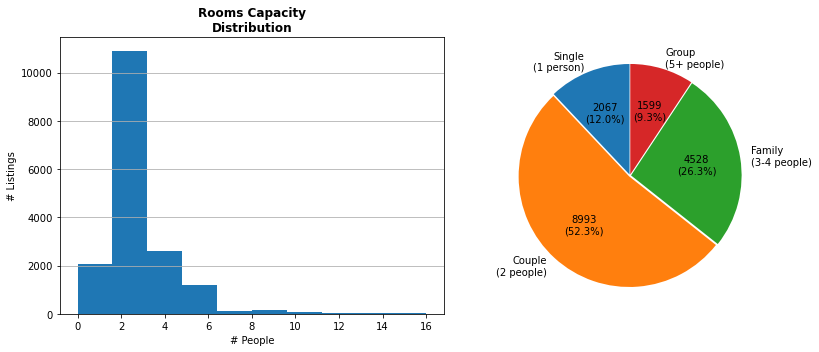

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

listings_lite_df['accommodates'].plot(kind='hist', ax=ax1)

ax1.set_xlabel('# People')
ax1.set_ylabel('# Listings')
ax1.set_title('Rooms Capacity\nDistribution', weight='bold')
ax1.grid(axis='y')

pie_data = (
    listings_lite_df['accommodates_group']
    .value_counts()
    .sort_index())

pie_data.plot(
    kind='pie', 
    labels=['Single\n(1 person)', 'Couple\n(2 people)', 'Family\n(3-4 people)', 'Group\n(5+ people)'],
    autopct=lambda v: (
         '{}'.format(int(v/100*sum(pie_data))) +
         '\n' + '({:.1%})'.format(v/100)),
    startangle=90,
    explode=(0.01, ) * len(pie_data),
    ax=ax2)

ax2.set_ylabel('')

fig.tight_layout()
plt.show()

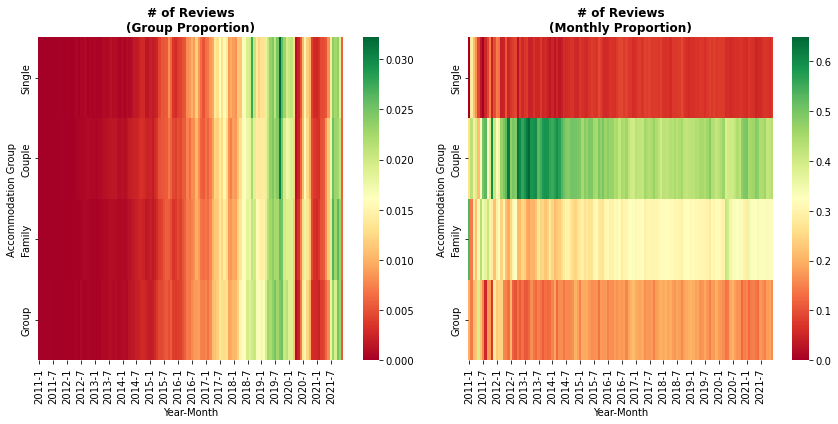

In [35]:
n_reviews_year_month_x_accgroup_df = (
    reviews_df2
    .groupby([
        reviews_df2['date'].dt.year.rename('Year'),
        reviews_df2['date'].dt.month.rename('Month'),
        'accommodates_group'])
    .size()
    .unstack(['accommodates_group'])
    .fillna(0))

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(n_reviews_year_month_x_accgroup_df.T.apply(lambda row: row / row.sum(), axis=1), cmap='RdYlGn', ax=ax)

ax.set_ylabel('Accommodation Group')
ax.set_xlabel('Year-Month')
ax.set_title('# of Reviews\n(Group Proportion)', weight='bold')

sns.heatmap(n_reviews_year_month_x_accgroup_df.T.apply(lambda col: col / col.sum()), cmap='RdYlGn', ax=ax2)

ax2.set_ylabel('Accommodation Group')
ax2.set_xlabel('Year-Month')
ax2.set_title('# of Reviews\n(Monthly Proportion)', weight='bold')

fig.tight_layout()
plt.show()

+ On the left we see the number of reviews growing along time, for all accomodation groups. When Corona started the number of reviews went down and since then we see ups and downs because the numbers are dependant on the Corona waves.

+ On the right we see that in almost any given moment in time the proportion of accommodations for singles and groups is lower than those for family and couple, that is the proportion does not change over time. That makes sense, as we saw in the previous pie plot most of the listings have the ideal capacity for hosting couples and families.

In order to see the distribution of the different accomodation groups along the year we need normalize the proportion of a group along time:

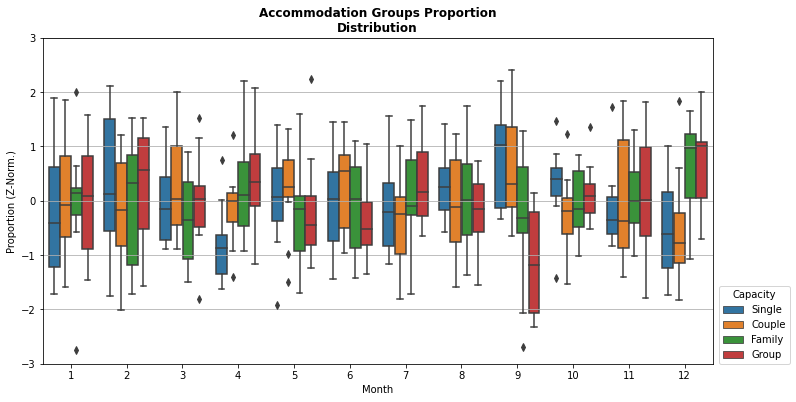

In [36]:
n_reviews_year_month_x_accgroup_df = (
    reviews_df2
    .groupby([
        reviews_df2['date'].dt.year.rename('Year'),
        reviews_df2['date'].dt.month.rename('Month'),
        'accommodates_group'])
    .size()
    .unstack(['accommodates_group'])
    .fillna(0))

znorm_perc_reviews_year_month_x_accgroup_df = (
    n_reviews_year_month_x_accgroup_df
    # per each year and month we compute the proportion of reviews in each "accommodation group"
    .divide(n_reviews_month_x_year_df.stack().swaplevel().sort_index(), axis=0)
    # we normalize this number across months of the same year
    .unstack('Year')
    .apply(lambda col: (col - col.mean()) / col.std())
    .stack('Year')
    .swaplevel()
    .sort_index())

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x='Month', y='z_perc', hue='accommodates_group', 
            data=(znorm_perc_reviews_year_month_x_accgroup_df
                  .stack()
                  .sort_index()
                  .to_frame('z_perc')
                  .reset_index()), ax=ax)
ax.set_ylabel('Proportion (Z-Norm.)')
ax.set_ylim(-3,3)
ax.set_title('Accommodation Groups Proportion\nDistribution', weight='bold')
ax.grid(axis='y')


ax.legend(title='Capacity', loc=(1.01, 0))

plt.show()

Now we can compare proportions:

+ For single rooms there is a higher proportion of reviews (and therefore reservations) in September and January-February, possibly rented to students or workers that came to find a new apartment in the city for the new academic/working year

+ During the summer (July-August) the proportion of small rooms is very low while there is a preference for larger rooms that host families and groups, possibly tourists and large group of friends.

# 5.Conclusions

+ The most popular listings in Berlin are for entire apartments or homes which make around 60% of the listings. For single rooms only 40%.
+ High concentration of accommodations in the center, which should be normal for every city.  
+ Speculation is not a problem, as only 8.5% of the hosts that own an entire property actually have at least another flat listed.
+ No price difference between listings with English and German titles.
+ Number of reviews (and therefore, number of bookings) increasing every year until Corona. The pandemic situation makes it difficult for numbers to stabilize.